<a href="https://colab.research.google.com/github/sandarnaing/tutorial/blob/main/tutorial_2_dataprofessor/Cheminformatics_predicting_solubility_100124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.6 MB/s eta 0:00:00


In [ ]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv

--2024-01-09 05:07:59--  https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58889 (58K) [text/plain]
Saving to: ‘delaney.csv’

delaney.csv         100%[===================>]  57.51K  --.-KB/s    in 0.01s   

2024-01-09 05:07:59 (4.68 MB/s) - ‘delaney.csv’ saved [58889/58889]



In [ ]:
import pandas as pd

sol = pd.read_csv('delaney.csv')
sol

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [ ]:
sol.SMILES

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object

In [ ]:
sol.SMILES[0]

'ClCC(Cl)(Cl)Cl'

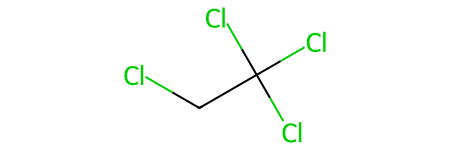

In [ ]:
from rdkit import Chem
Chem.MolFromSmiles(sol.SMILES[0])

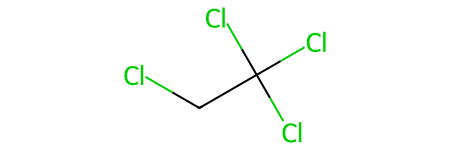

In [ ]:
Chem.MolFromSmiles('ClCC(Cl)(Cl)Cl')

In [ ]:
m = Chem.MolFromSmiles('ClCC(Cl)(Cl)Cl')
m.GetNumAtoms()

6

In [ ]:
mol_list = []
for element in sol.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [ ]:
len(mol_list)

1144

In [ ]:
mol_list[:5]

In [ ]:
mol_list2 = [Chem.MolFromSmiles(element) for element in sol.SMILES]
len(mol_list2)

1144

In [ ]:
import numpy as np
from rdkit.Chem import Descriptors

def generate(smiles, verbose = False):
  moldata = []
  for elem in smiles:
    mol = Chem.MolFromSmiles(elem)
    moldata.append(mol)

  baseData = np.arange(1,1)
  i = 0
  for mol in moldata:
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_MolWt = Descriptors.MolWt(mol)
    desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
    row = np.array([desc_MolLogP,
                    desc_MolWt,
                    desc_NumRotatableBonds])
    if(i == 0):
      baseData = row
    else:
      baseData = np.vstack([baseData, row])
    i = i+1

  columnNames = ["MolLogP", "MolWt", "NumRotatableBonds"]
  descriptors = pd.DataFrame(data = baseData, columns = columnNames)

  return descriptors

In [ ]:
df = generate(sol.SMILES)
df

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


In [ ]:
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms

[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True]

In [ ]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i == True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [ ]:
AromaticAtoms(m)

19

In [ ]:
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
desc_AromaticAtoms

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 10,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 10,
 6,
 0,
 10,
 0,
 14,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 12,
 10,
 14,
 6,
 10,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 6,
 6,
 12,
 12,
 6,
 0,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 10,
 0,
 6,
 12,
 12,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 12,
 12,
 6,
 10,
 6,
 6,
 6,
 12,
 10,
 14,
 10,
 10,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 12,
 0,
 10,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 6,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 0,

In [ ]:
df_desc_AromaticProportion = pd.DataFrame(desc_AromaticAtoms, columns = ['AromaticProportion'])
df_desc_AromaticProportion

,AromaticProportion
0,0
1,0
2,0
3,0
4,0
...,...
1139,0
1140,6
1141,16
1142,12


In [ ]:
X = pd.concat([df,df_desc_AromaticProportion], axis = 1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0
1,2.37650,133.405,0.0,0
2,2.59380,167.850,1.0,0
3,2.02890,133.405,1.0,0
4,2.91890,187.375,1.0,0
...,...,...,...,...
1139,1.98820,287.343,8.0,0
1140,3.42130,286.114,2.0,6
1141,3.60960,308.333,4.0,16
1142,2.56214,354.815,3.0,12


In [ ]:
sol.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


In [ ]:
Y = sol.iloc[:,1]
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: measured log(solubility:mol/L), Length: 1144, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = linear_model.LinearRegression ()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred_train = model.predict(X_train)

In [ ]:
print('Coefficient', model.coef_)
print('Intercept', model.intercept_)
print('Mean squared error (MSE): %.2f'
        % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
        % r2_score(Y_train, Y_pred_train))

Coefficient [-0.72608658 -0.00589627 -0.0105982  -0.04266925]
Intercept 0.168306299356193
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.77


In [ ]:
Y_pred_test = model.predict(X_test)

In [ ]:
print('Coefficient', model.coef_)
print('Intercept', model.intercept_)
print('Mean squared error (MSE): %.2f'
        % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
        % r2_score(Y_test, Y_pred_test))

Coefficient [-0.72608658 -0.00589627 -0.0105982  -0.04266925]
Intercept 0.168306299356193
Mean squared error (MSE): 0.91
Coefficient of determination (R^2): 0.80


In [ ]:
print('LogS = %.2f %.2f LogP %.4f MW %.4f RB %.2f AP' % (model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3]))

LogS = 0.17 -0.73 LogP -0.0059 MW -0.0106 RB -0.04 AP


In [ ]:
fullDataset = linear_model.LinearRegression()
fullDataset.fit(X,Y)

LinearRegression()

In [ ]:
fullDataset_pred = model.predict(X)

In [ ]:
print('Coefficient', fullDataset.coef_)
print('Intercept', fullDataset.intercept_)
print('Mean squared error (MSE): %.2f'
        % mean_squared_error(Y, fullDataset_pred))
print('Coefficient of determination (R^2): %.2f'
        % r2_score(Y, fullDataset_pred))

In [ ]:
print('LogS = %.2f %.2f LogP %.4f MW %.4f RB %.2f AP' % (fullDataset.intercept_, fullDataset.coef_[0], fullDataset.coef_[1], fullDataset.coef_[2], fullDataset.coef_[3]))

LogS = 0.17 -0.72 LogP -0.0060 MW -0.0008 RB -0.04 AP


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Y_train.shape, Y_pred_train.shape

((915,), (915,))

In [ ]:
Y_test.shape, Y_pred_test.shape

((229,), (229,))

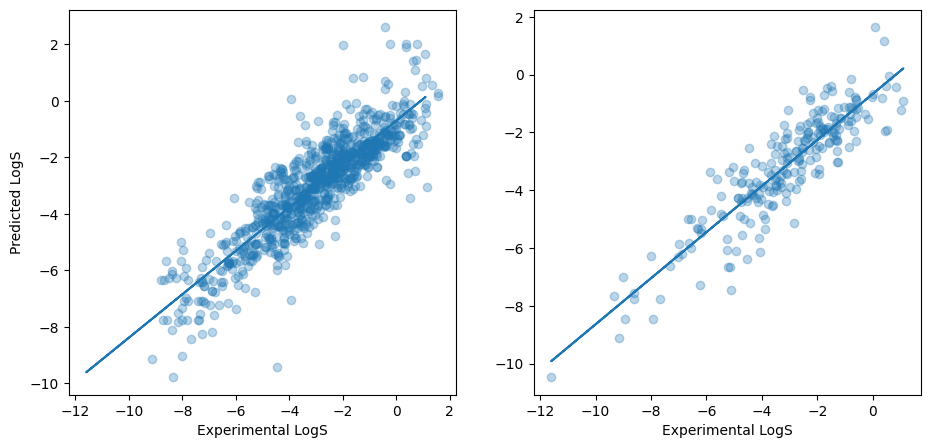

In [ ]:
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
plt.scatter(x = Y_train, y = Y_pred_train, alpha = 0.3)

z = np.polyfit (Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test, p(Y_test))

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

plt.subplot(1,2,2)
plt.scatter(x = Y_test, y = Y_pred_test, alpha = 0.3)

z = np.polyfit (Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test, p(Y_test))

plt.xlabel('Experimental LogS')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators = 100)
model2.fit(X_train, Y_train)
r2 = model2.score(X_test, Y_test)
r2

0.8787804088728339

In [ ]:
Y_pred = model2.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

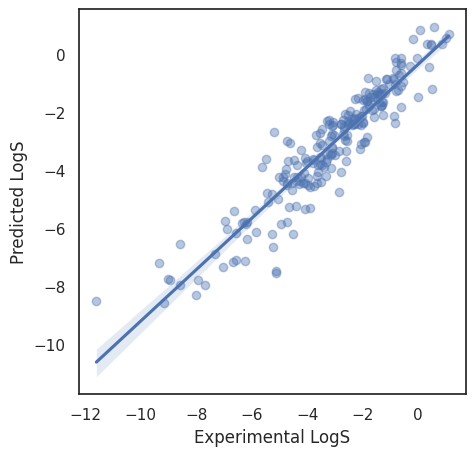

In [ ]:
import seaborn as sns
sns.set(color_codes = True)
sns.set_style("white")
ax = sns.regplot(x = Y_test, y = Y_pred, scatter_kws = {'alpha':0.4})
ax.set_xlabel('Experimental LogS')
ax.set_ylabel('Predicted LogS')
ax.figure.set_size_inches(5,5)
plt.show

In [ ]:
! pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
clf = LazyRegressor(verbose = 0, custom_metric = None, ignore_warnings = True)
models_train, predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test, predictions_test = clf.fit(X_test, X_test, Y_test, Y_test)

 52%|█████▏    | 22/42 [00:01<00:00, 23.62it/s]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 69%|██████▉   | 29/42 [00:01<00:00, 15.84it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(
100%|██████████| 42/42 [00:02<00:00, 19.42it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 915, number of used features: 4
[LightGBM] [Info] Start training from score -3.032007
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 48%|████▊     | 20/42 [00:00<00:00, 31.10it/s]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 62%|██████▏   | 26/42 [00:00<00:00, 30.22it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(
100%|██████████| 42/42 [00:01<00:00, 33.80it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 229, number of used features: 4
[LightGBM] [Info] Start training from score -3.161847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,1.00,1.00,0.14,0.01
ExtraTreeRegressor,1.00,1.00,0.14,0.01
ExtraTreesRegressor,1.00,1.00,0.14,0.14
XGBRegressor,0.99,0.99,0.17,0.06
GaussianProcessRegressor,0.99,0.99,0.24,0.11
RandomForestRegressor,0.98,0.98,0.29,0.22
BaggingRegressor,0.98,0.98,0.32,0.03
HistGradientBoostingRegressor,0.96,0.96,0.42,0.23
LGBMRegressor,0.96,0.96,0.42,0.05


In [ ]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,1.00,1.00,0.08,0.01
ExtraTreeRegressor,1.00,1.00,0.08,0.01
ExtraTreesRegressor,1.00,1.00,0.08,0.09
XGBRegressor,1.00,1.00,0.08,0.04
GaussianProcessRegressor,1.00,1.00,0.08,0.02
RandomForestRegressor,0.98,0.98,0.32,0.14
BaggingRegressor,0.97,0.97,0.38,0.02
GradientBoostingRegressor,0.96,0.96,0.44,0.12
HistGradientBoostingRegressor,0.93,0.93,0.58,0.08


[(0.0, 1.0)]

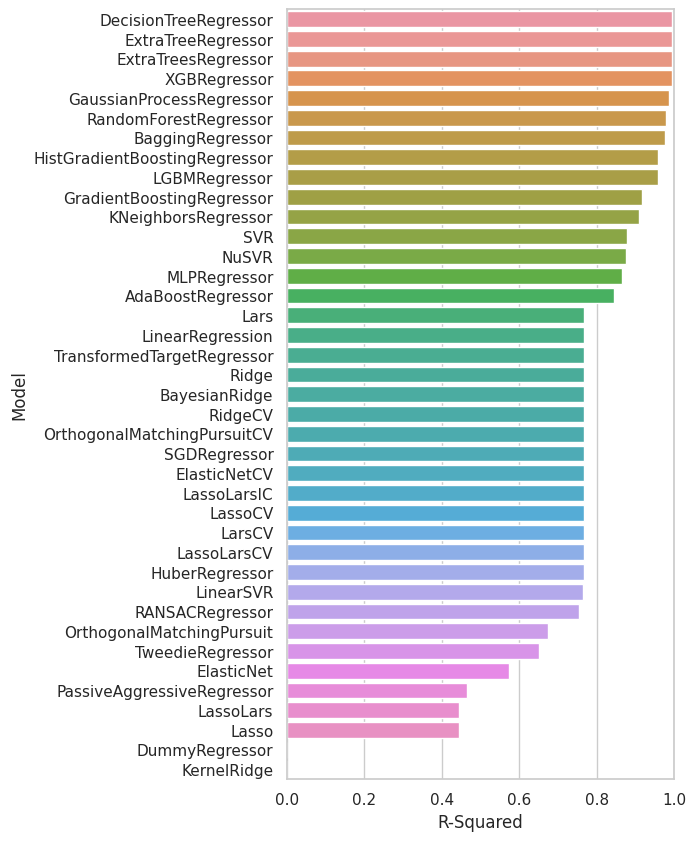

In [ ]:
plt.figure(figsize = (5, 10))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(y = predictions_train.index, x = "R-Squared", data = predictions_train)
ax.set(xlim = (0, 1))

[(0.0, 5.0)]

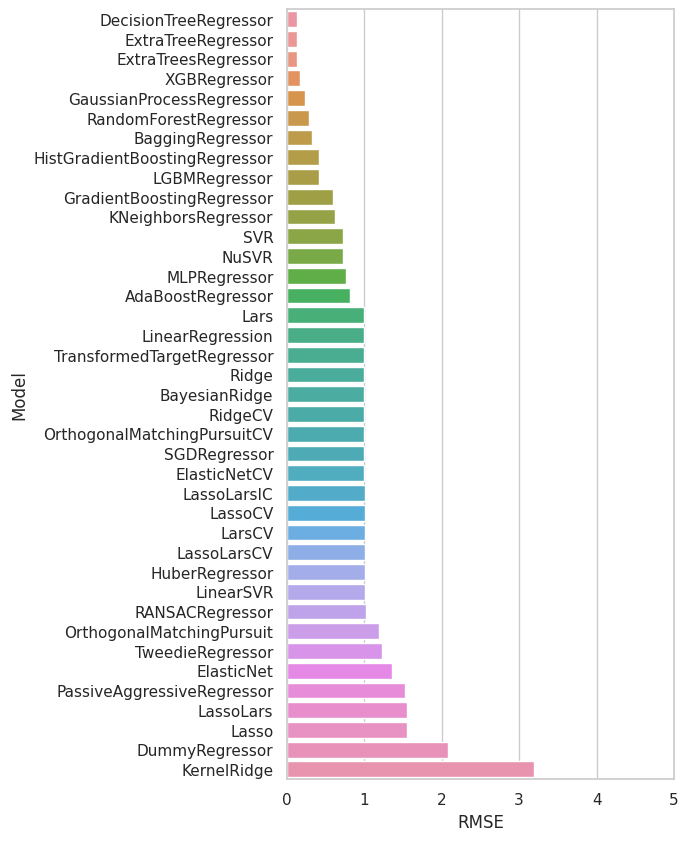

In [ ]:
plt.figure(figsize = (5, 10))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(y = predictions_train.index, x = "RMSE", data = predictions_train)
ax.set(xlim = (0, 5))

[(0.0, 0.6)]

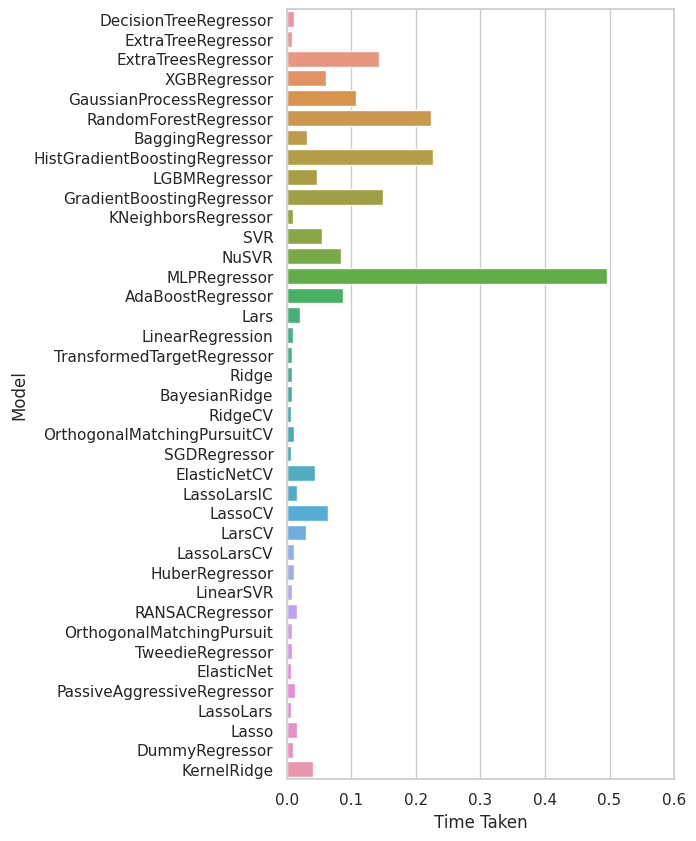

In [ ]:
plt.figure(figsize = (5, 10))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(y = predictions_train.index, x = "Time Taken", data = predictions_train)
ax.set(xlim = (0, 0.6))